# 7.2 Problema do Carteiro Chinês

O problema do carteiro foi estudado pelo matemático chinês Kwan Mei-Ko em 1962 (KWAN, 1962) e consiste em encontrar um caminho fechado com custo mínimo em um grafo conexo valorado. O termo "carteiro" é uma analogia ao serviço de entrega de correspondência, imaginando que um carteiro precisaria entregar correspondência em todas as ruas de um bairro, voltando ao seu ponto de partida e além disso caminhando a menor distância total possível.

Se o grafo valorado for euleriano, a solução para o problema é trivial. Como um ciclo euleriano percorre todas as arestas somente uma vez, este já seria a rota com custo mínimo escolhida pelo carteiro e o seu custo total é igual à soma dos custos de todas as arestas.

Por outro lado, se o grafo não for euleriano, o requisito de passarmos por todas as ruas (isto é, todas as arestas) faz com que seja necessário definir um trajeto repetindo algumas ruas. A questão fundamental é decidir quais ruas repetir de forma que se acrescente o menor custo adicional possível.

## 7.2.1 Eulerização de grafos

Para resolver a questão de repetição das “ruas” na rota do carteiro, vejamos o processo de “eulerização” de grafos não-eulerianos, descrito por Saoub (2017). Existem duas condições para um grafo não ser euleriano: não ser conexo ou não ter todos os seus vértices de grau par. O processo de “eulerização” de grafos conexos, aborda a questão dos graus dos vértices para obter um grafo euleriano a partir de um grafo não-euleriano conexo.

**Definição 7.5 (Eulerização):**  
Dado um grafo conexo G = (V,E), uma Eulerização de G é o grafo Ge = (V,Ee) tal que:
1. Ge é obtido pela duplicação de arestas de G; e
2. todos os vértices de Ge possuem grau par.

Uma maneira de se obter a eulerização de um grafo é duplicando as arestas que ligam pares de vértices de grau ímpar. Caso reste algum par de vértices de grau ímpar não adjacentes, deve-se duplicar arestas ao longo de um caminho entre estes dois vértices. Tal caminho é chamado de caminho artificial e as arestas duplicadas são chamadas de arestas artificiais.

A Figura 7.3 mostra um exemplo deste processo. O grafo G da Figura 7.3a tem 4 vértices de grau ímpar. Obtemos a eulerização de G mostrada na Figura 7.3b criando uma aresta artificial entre os vértices g e d, e um caminho artificial entre os vértices e e b, representados pelas arestas tracejadas. Note que os vértices de grau par no meio de um caminho artificial (como o vértice c, por exemplo) continuam tendo grau par após a criação do caminho.

## 7.2.2 Algoritmo para o problema do carteiro chinês

O pseudocódigo do algoritmo 7.4 encontra a solução do problema do carteiro chinês em grafos valorados determinando um caminho fechado com custo mínimo que passe por todas as arestas. A ideia básica é promover a eulerização do grafo construindo caminhos artificiais com custo mínimo entre pares de vértices de grau ímpar.

**Algoritmo: CarteiroChines(G, W)**

```plaintext
// Inicialização
V_par ← {conjunto dos vértices de grau par};
Ge ← G;
// Calcula os caminhos mínimos
Execute FLOYD(G, W) para construir a matriz de distâncias Dn;
// Remove da matriz as linhas e colunas dos vértices de grau par
Dimpar ← Dn ≠ (linhas e colunas de V_par);
// Laço principal
enquanto Dimpar ≠ ∅ faça
    Determine em Dimpar o par de vértices vi e vj com menor custo dimpar_{i,j};
    Construa um caminho artificial de vi para vj com custo dimpar_{i,j} no grafo Ge;
    // Remove da matriz as linhas e colunas de vi e vj
    Dimpar ← Dimpar ≠ (linhas e colunas de vi e vj);
// Encontrando o resultado final
Encontre um ciclo euleriano do grafo Ge;
```

*Algoritmo 7.4: Problema do carteiro chinês*

Inicialmente, determinamos quais são os vértices de grau par e criamos um grafo Ge que, ao final do algoritmo, será uma eulerização de G com custo mínimo. Em seguida, chamamos o algoritmo de Floyd para calcular os caminhos mínimos entre todos os pares de vértices e obtemos a matriz de distâncias (ou custos) mínimas Dn. Como só precisamos encontrar caminhos artificiais entre pares de vértices de grau ímpar, removemos as linhas e colunas de vértices de grau par da matriz Dn para construir uma nova matriz chamada Dimpar, que contém somente as linhas e colunas, e portanto, os caminhos mínimos, dos vértices de grau ímpar.

O laço principal do algoritmo encontra na matriz Dimpar o par de vértices vi e vj com menor custo mínimo atual e constrói no grafo Ge o respectivo caminho artificial. As linhas e colunas correspondentes a vi e vj são removidas da matriz Dimpar e o processo se repete enquanto a matriz não estiver vazia. Ao final, o grafo Ge corresponde a uma eulerização do grafo G com custo mínimo e basta encontrar um ciclo euleriano em Ge para obter a solução do problema.

### Exemplo 7.3

Dado o grafo G = (V,E) da Figura 7.4, observamos que os vértices v1, v3, v4, v5, v9 e v11 possuem grau ímpar, enquanto que os vértices v2, v6, v7, v8, v10 e v12 possuem grau par. Após calcular os caminhos mínimos entre todos os pares de vértices e eliminar da matriz Dn as linhas e colunas referentes aos vértices de grau par, obtemos a matriz Dimpar mostrada ao lado do grafo.

#### Figura 7.4 – Primeira iteração do carteiro chinês

Abaixo está o grafo G e a matriz Dimpar correspondente após a remoção dos vértices de grau par:

```
Dimpar =
      v1  v3  v4  v5  v9  v11
v1     0  20  15  11  19   22
v3    20   0  19  20  24   12
v4    15  19   0  17  19    7
v5    11  20  17   0  30   24
v9    19  24  19  30   0   12
v11   22  12   7  24  12    0
```

O caminho mínimo entre os vértices v4 e v11 é o menor dentre todos os caminhos mínimos da matriz Dimpar. Portanto, é construído o caminho artificial entre estes dois vértices, mostrado em linhas tracejadas na Figura 7.5. As linhas e colunas referentes aos vértices v4 e v11 são removidas da matriz Dimpar para a próxima iteração.

#### Figura 7.5 – Segunda iteração do carteiro chinês

Após remover v4 e v11, a matriz Dimpar fica:

```
Dimpar =
      v1  v3  v5  v9
v1     0  20  11  19
v3    20   0  19  24
v5    11  20   0  30
v9    19  24  30   0
```

Repetindo o procedimento, cria-se um caminho artificial com custo 11 entre os vértices v1 e v5.

#### Figura 7.6 – Terceira iteração do carteiro chinês

Após remover v1 e v5, a matriz Dimpar fica:

```
Dimpar =
      v3  v9
v3     0  24
v9    24   0
```

O único caminho mínimo restante é entre v3 e v9, com custo 24.

#### Figura 7.7 – Resultado final do carteiro chinês

Na etapa final, o laço principal do algoritmo se encerra quando a matriz Dimpar fica vazia. Considerando a existência das arestas artificiais, o grafo resultante é uma eulerização de G. Por fim, basta encontrar um ciclo euleriano incluindo as arestas artificiais para obter a solução do problema do carteiro chinês.

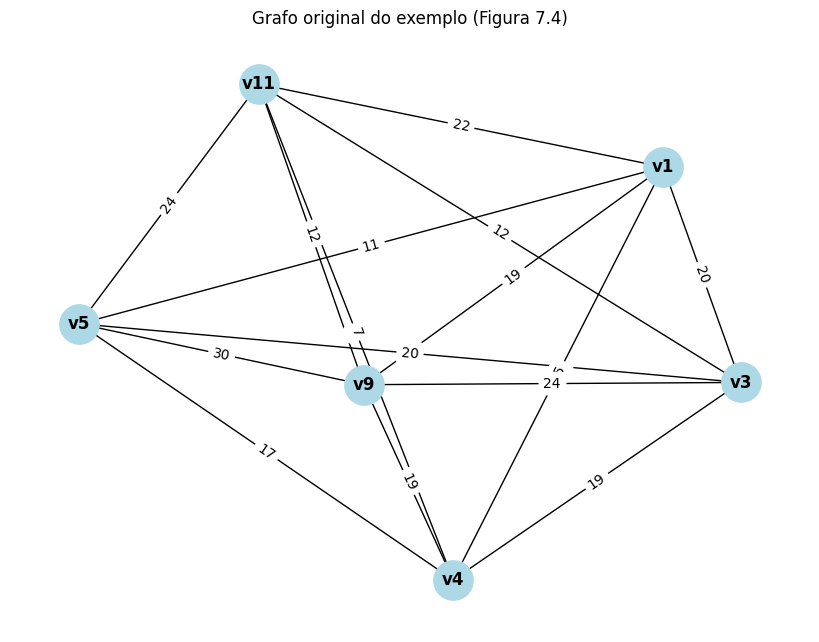

In [1]:
# Instale as bibliotecas necessárias (se necessário)
# !pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Grafo original do exemplo (Figura 7.4)
G = nx.Graph()
edges = [
    ('v1', 'v3', 20), ('v1', 'v4', 15), ('v1', 'v5', 11), ('v1', 'v9', 19), ('v1', 'v11', 22),
    ('v3', 'v4', 19), ('v3', 'v5', 20), ('v3', 'v9', 24), ('v3', 'v11', 12),
    ('v4', 'v5', 17), ('v4', 'v9', 19), ('v4', 'v11', 7),
    ('v5', 'v9', 30), ('v5', 'v11', 24),
    ('v9', 'v11', 12)
]
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo original do exemplo (Figura 7.4)")
plt.show()

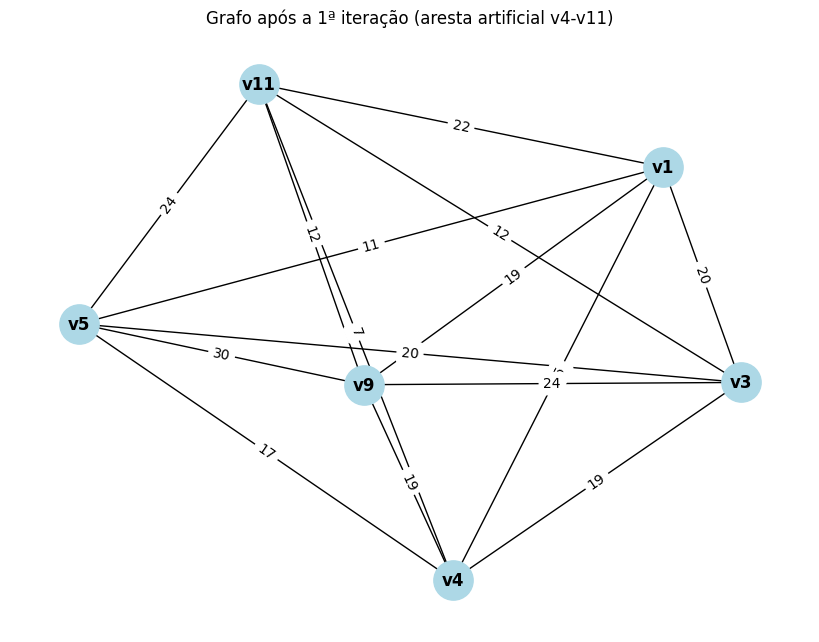

In [2]:
# Grafo após a primeira iteração (adicionando aresta artificial entre v4 e v11)
G1 = G.copy()
G1.add_edge('v4', 'v11', weight=7, style='dashed')  # já existe, mas destacamos como artificial

plt.figure(figsize=(8,6))
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
plt.title("Grafo após a 1ª iteração (aresta artificial v4-v11)")
plt.show()

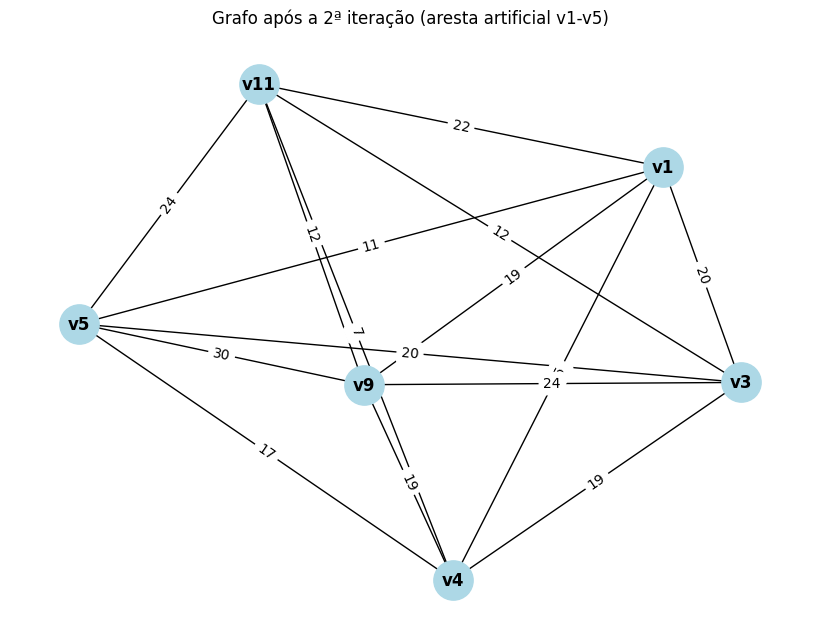

In [3]:
# Grafo após a segunda iteração (adicionando aresta artificial entre v1 e v5)
G2 = G1.copy()
G2.add_edge('v1', 'v5', weight=11, style='dashed')  # já existe, mas destacamos como artificial

plt.figure(figsize=(8,6))
nx.draw(G2, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.title("Grafo após a 2ª iteração (aresta artificial v1-v5)")
plt.show()

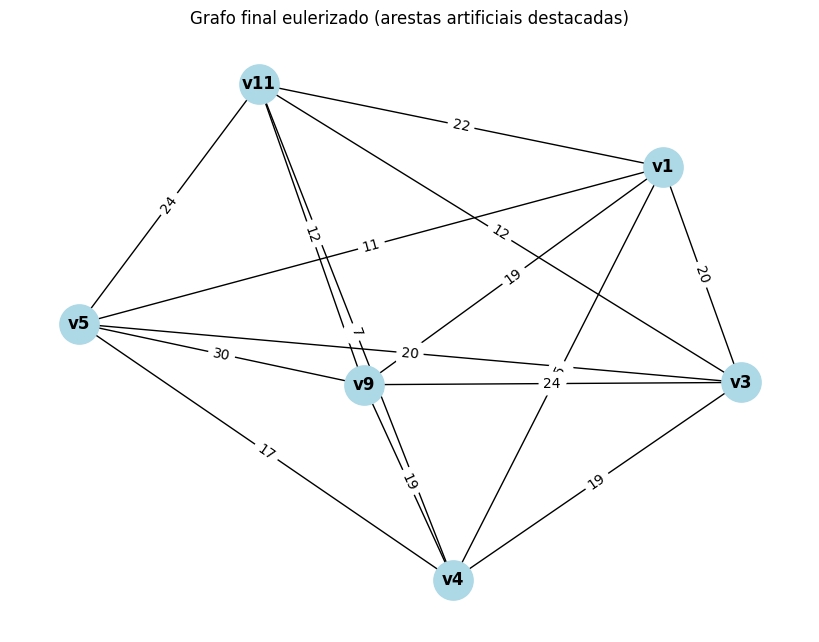

In [4]:
# Grafo após a terceira iteração (adicionando aresta artificial entre v3 e v9)
G3 = G2.copy()
G3.add_edge('v3', 'v9', weight=24, style='dashed')  # já existe, mas destacamos como artificial

plt.figure(figsize=(8,6))
nx.draw(G3, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=labels)
plt.title("Grafo final eulerizado (arestas artificiais destacadas)")
plt.show()